
# CRIM Intervals: Families of Melodies

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
from pandas.io.json import json_normalize
import re
import altair as alt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from ipywidgets import interact
import pyvis
from pyvis.network import Network
from pyvis import network as net
from IPython.display import display
import requests
import os
import glob as glob
import numpy as np
import random
import inspect
import networkx as nx
import networkx.algorithms.community as nx_comm
from copy import deepcopy
%matplotlib inline

## B. Importing a Piece

### B.1 Import a Piece

In [2]:
prefix = 'https://crimproject.org/mei/'
mei_file = 'CRIM_Model_0008.mei'
url = prefix + mei_file
piece = importScore(url)

Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei


# Graphing N-gram Families:

<br>

For just **one piece** with **fixed length** ngrams:

In [3]:
# setting up the figure size:
sns.set(rc={'figure.figsize':(15,9)})

In [4]:
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=4).dropna()

In [5]:
def patternToSeries(pattern):
    output_list = []
    output_list.append(0)
    output_list.append(pattern[0])
    for i in range(1, len(pattern)):
        output_list.append(sum(pattern[0:i]) + pattern[i])
    return output_list

In [6]:
# sample pattern to series:
patternToSeries([-2,-2,3])

[0, -2, -4, -1]

In [7]:
def createGraphList(pattern_list):
    graph_list = []
    for item in pattern_list:
        temp_item = list(map(lambda x: int(x), item))
        graph_list.append(patternToSeries(temp_item))
    return graph_list

In [8]:
def graphIntervalFamilies(ngrams):
    total_unique_ngrams_list = list(set(ngrams.values.flatten().tolist()))
    graph_pattern_list = createGraphList(total_unique_ngrams_list)
    for pattern in graph_pattern_list:
        plt.plot(pattern, alpha=0.35, lw=6)
    plt.yticks(np.arange(min(list(map(lambda x: sorted(x)[0], graph_pattern_list))) - 1, max(list(map(lambda x: sorted(x)[-1], graph_pattern_list))) + 1, 1.0))
    plt.xticks(np.arange(0, max(list(map(lambda x: len(x), graph_pattern_list))), 1.0))
    plt.show()

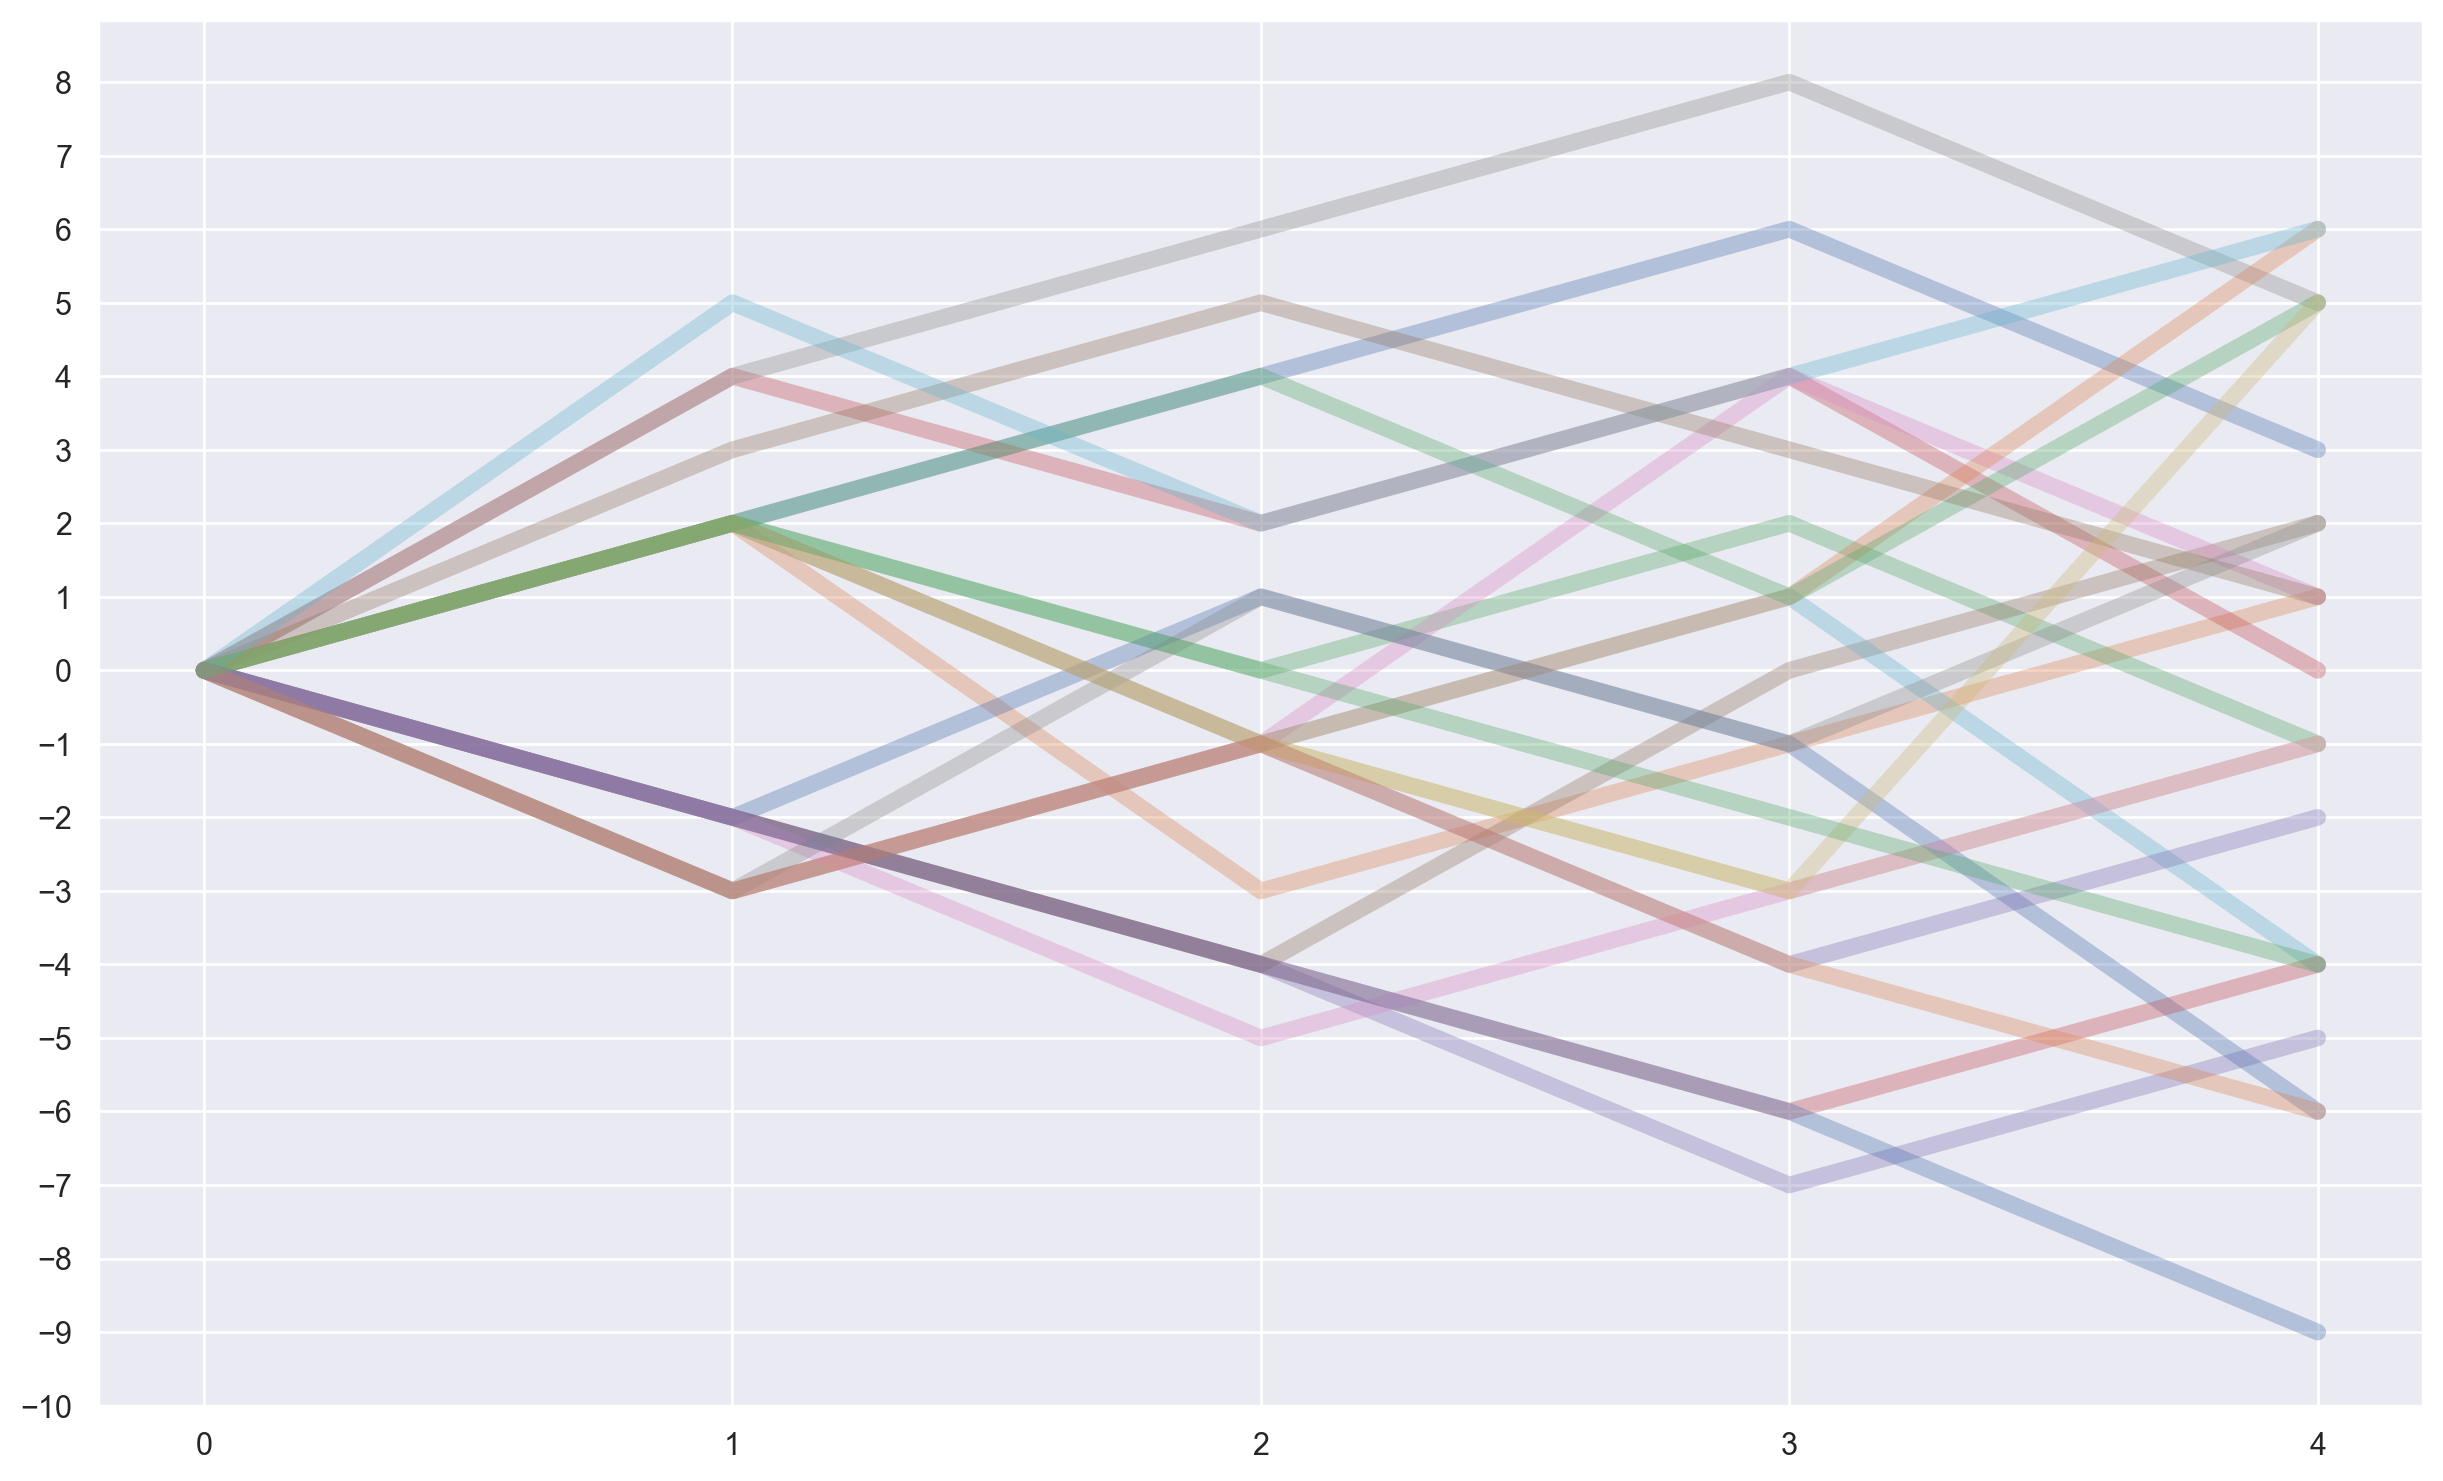

In [9]:
graphIntervalFamilies(ng)

In [10]:
def getVariableLengthNgrams(piece, max_length):
    local_notes = piece.notes(combineUnisons=True)
    local_ngrams = pd.DataFrame(columns=local_notes.columns)
    for i in range(1, max_length + 1):  
        local_melodic = piece.melodic(df=local_notes, kind='d', end=False)
        loop_ngrams = piece.ngrams(df=local_melodic, n=int(i)).dropna()
        local_ngrams = pd.concat([local_ngrams, loop_ngrams])
    return local_ngrams

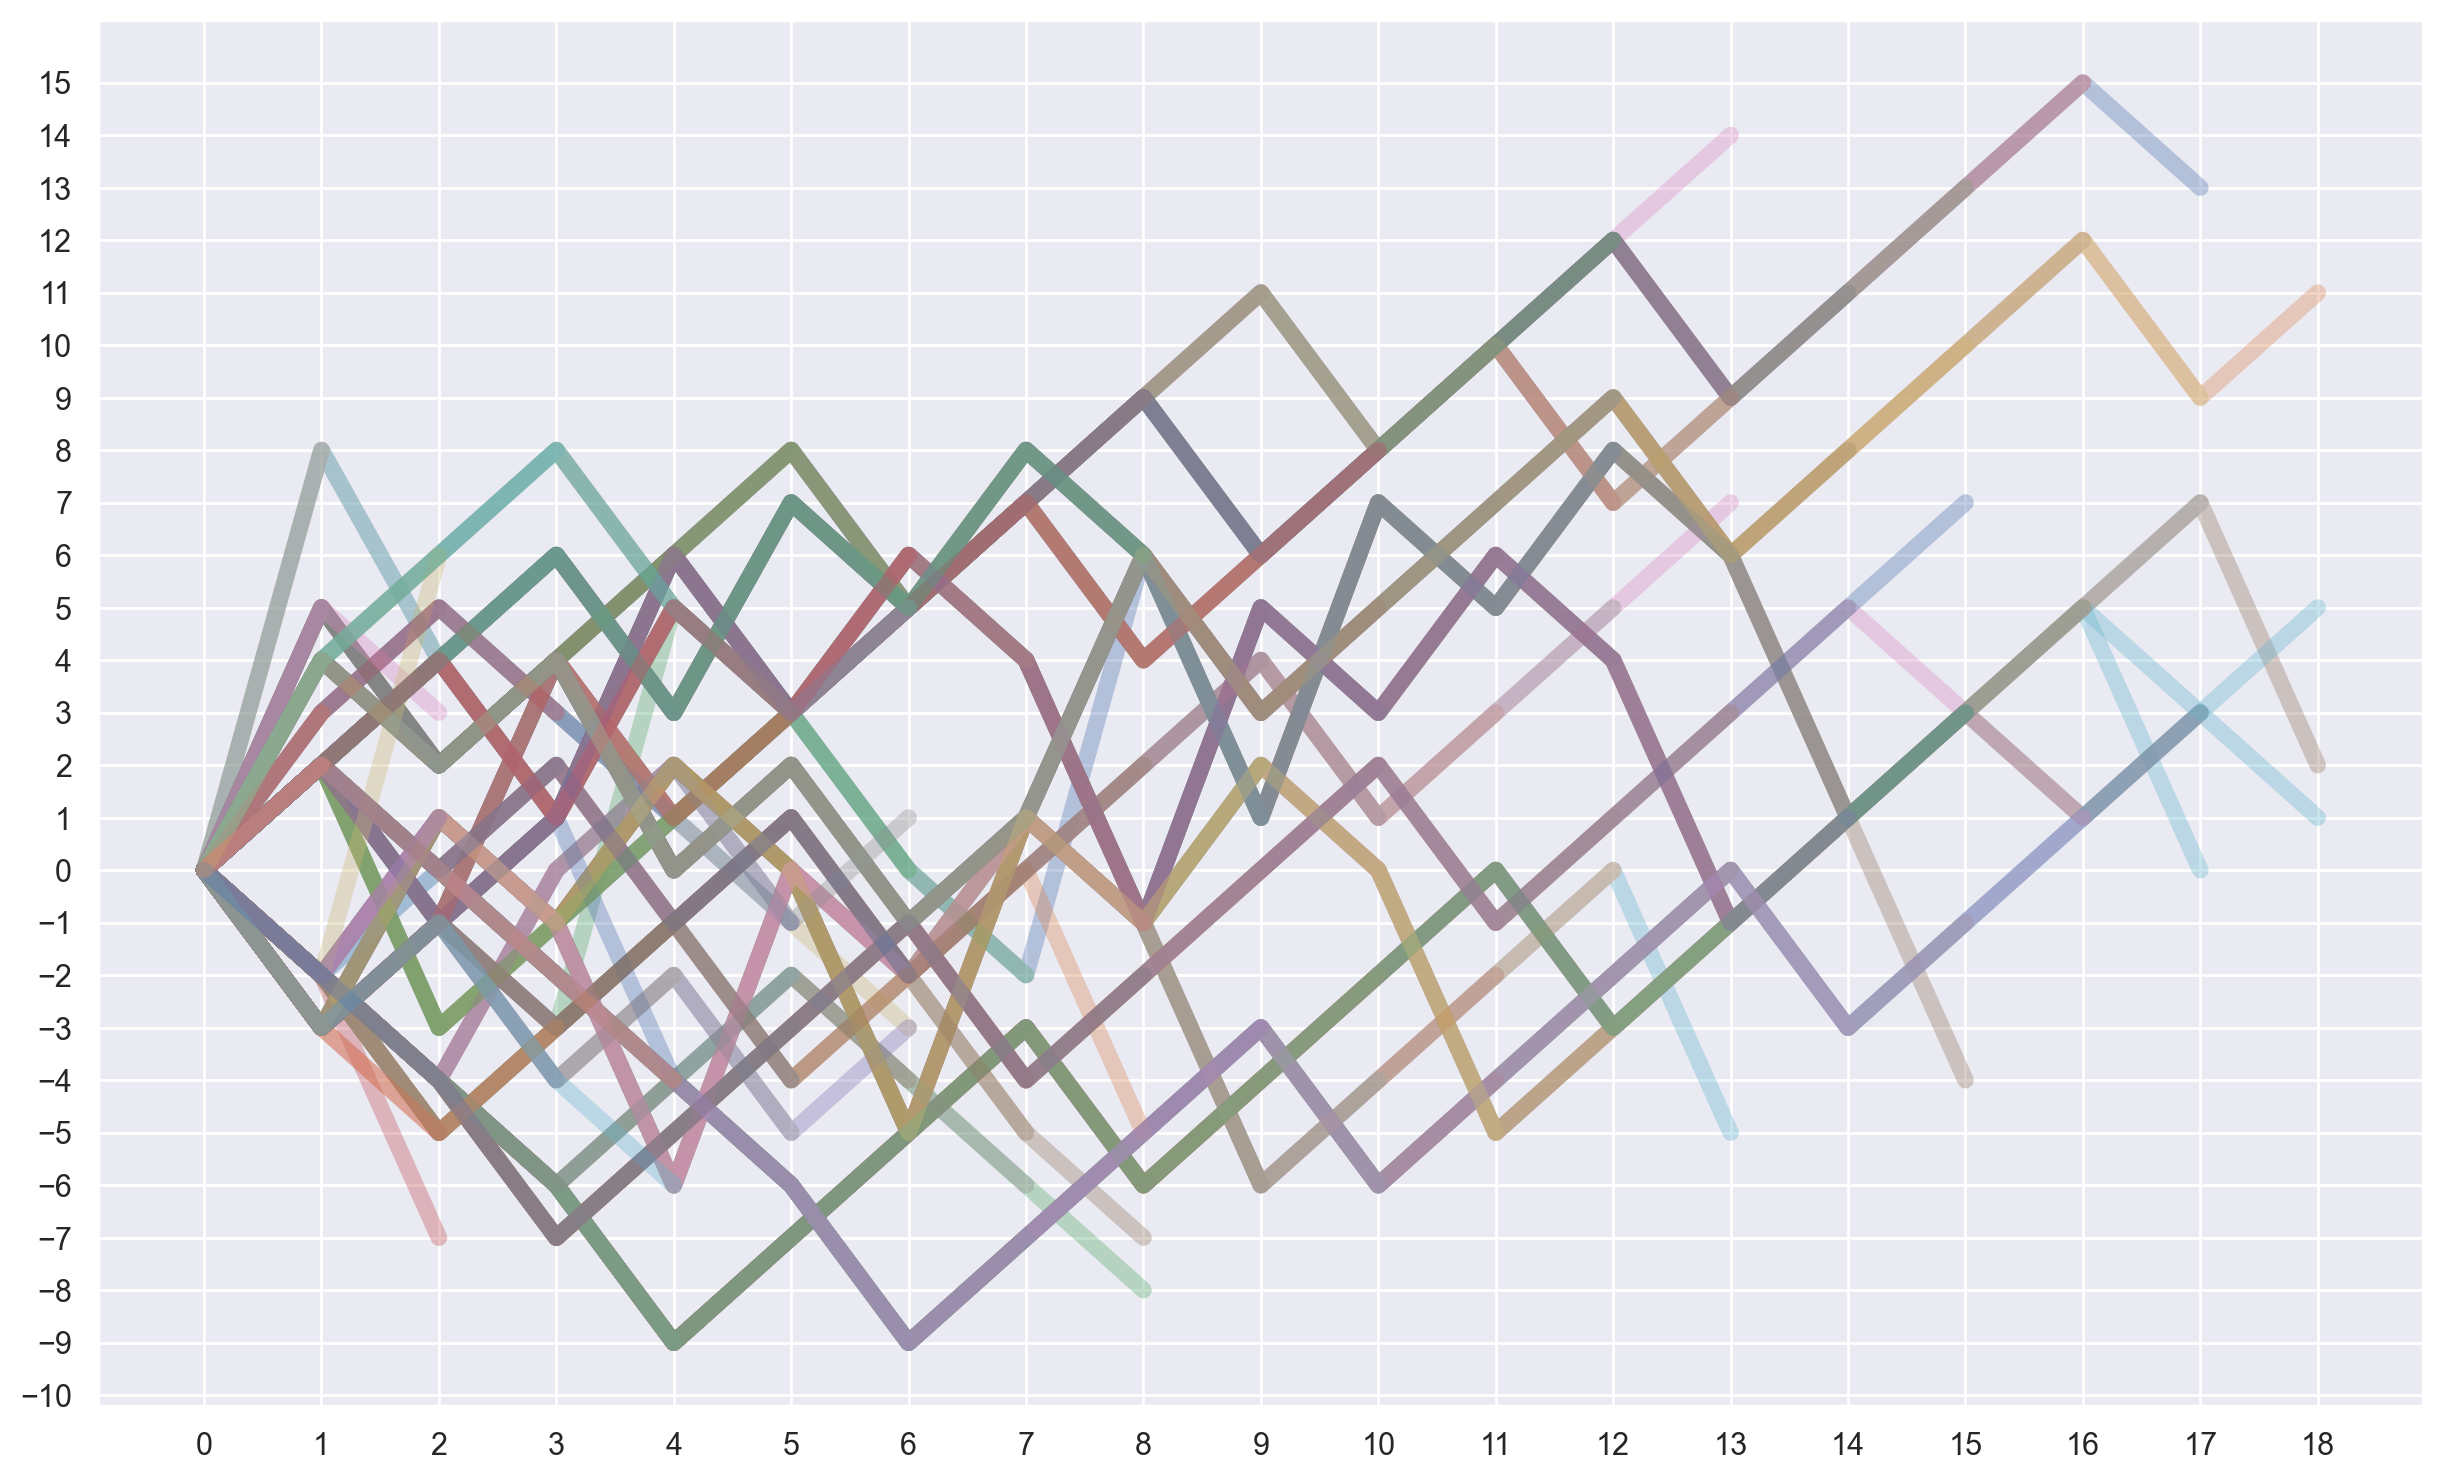

In [11]:
graphIntervalFamilies(getVariableLengthNgrams(piece, 20))

In [12]:
mei_file_2 = 'CRIM_Model_0009.mei'
url_2 = prefix + mei_file_2
piece_2 = importScore(url_2)

Successfully imported https://crimproject.org/mei/CRIM_Model_0009.mei


In [13]:
def graphIntervalFamiliesMP(pieces_list, max_length):
    for piece_item in pieces_list:
        local_color = "#" + str(hex(random.randint(0,16777215)))[2:]
        piece_variable_ngrams = getVariableLengthNgrams(piece_item, max_length)
        local_unique_ngrams_list = list(set(piece_variable_ngrams.values.flatten().tolist()))
        to_graph_pattern_list = createGraphList(local_unique_ngrams_list)
        for single_pattern in to_graph_pattern_list:
            plt.plot(single_pattern, alpha=0.35, lw=6, color=local_color)
    plt.yticks(np.arange(-15, 15, 1.0))
    plt.xticks(np.arange(0, max_length + 1, 1.0))
    plt.show()

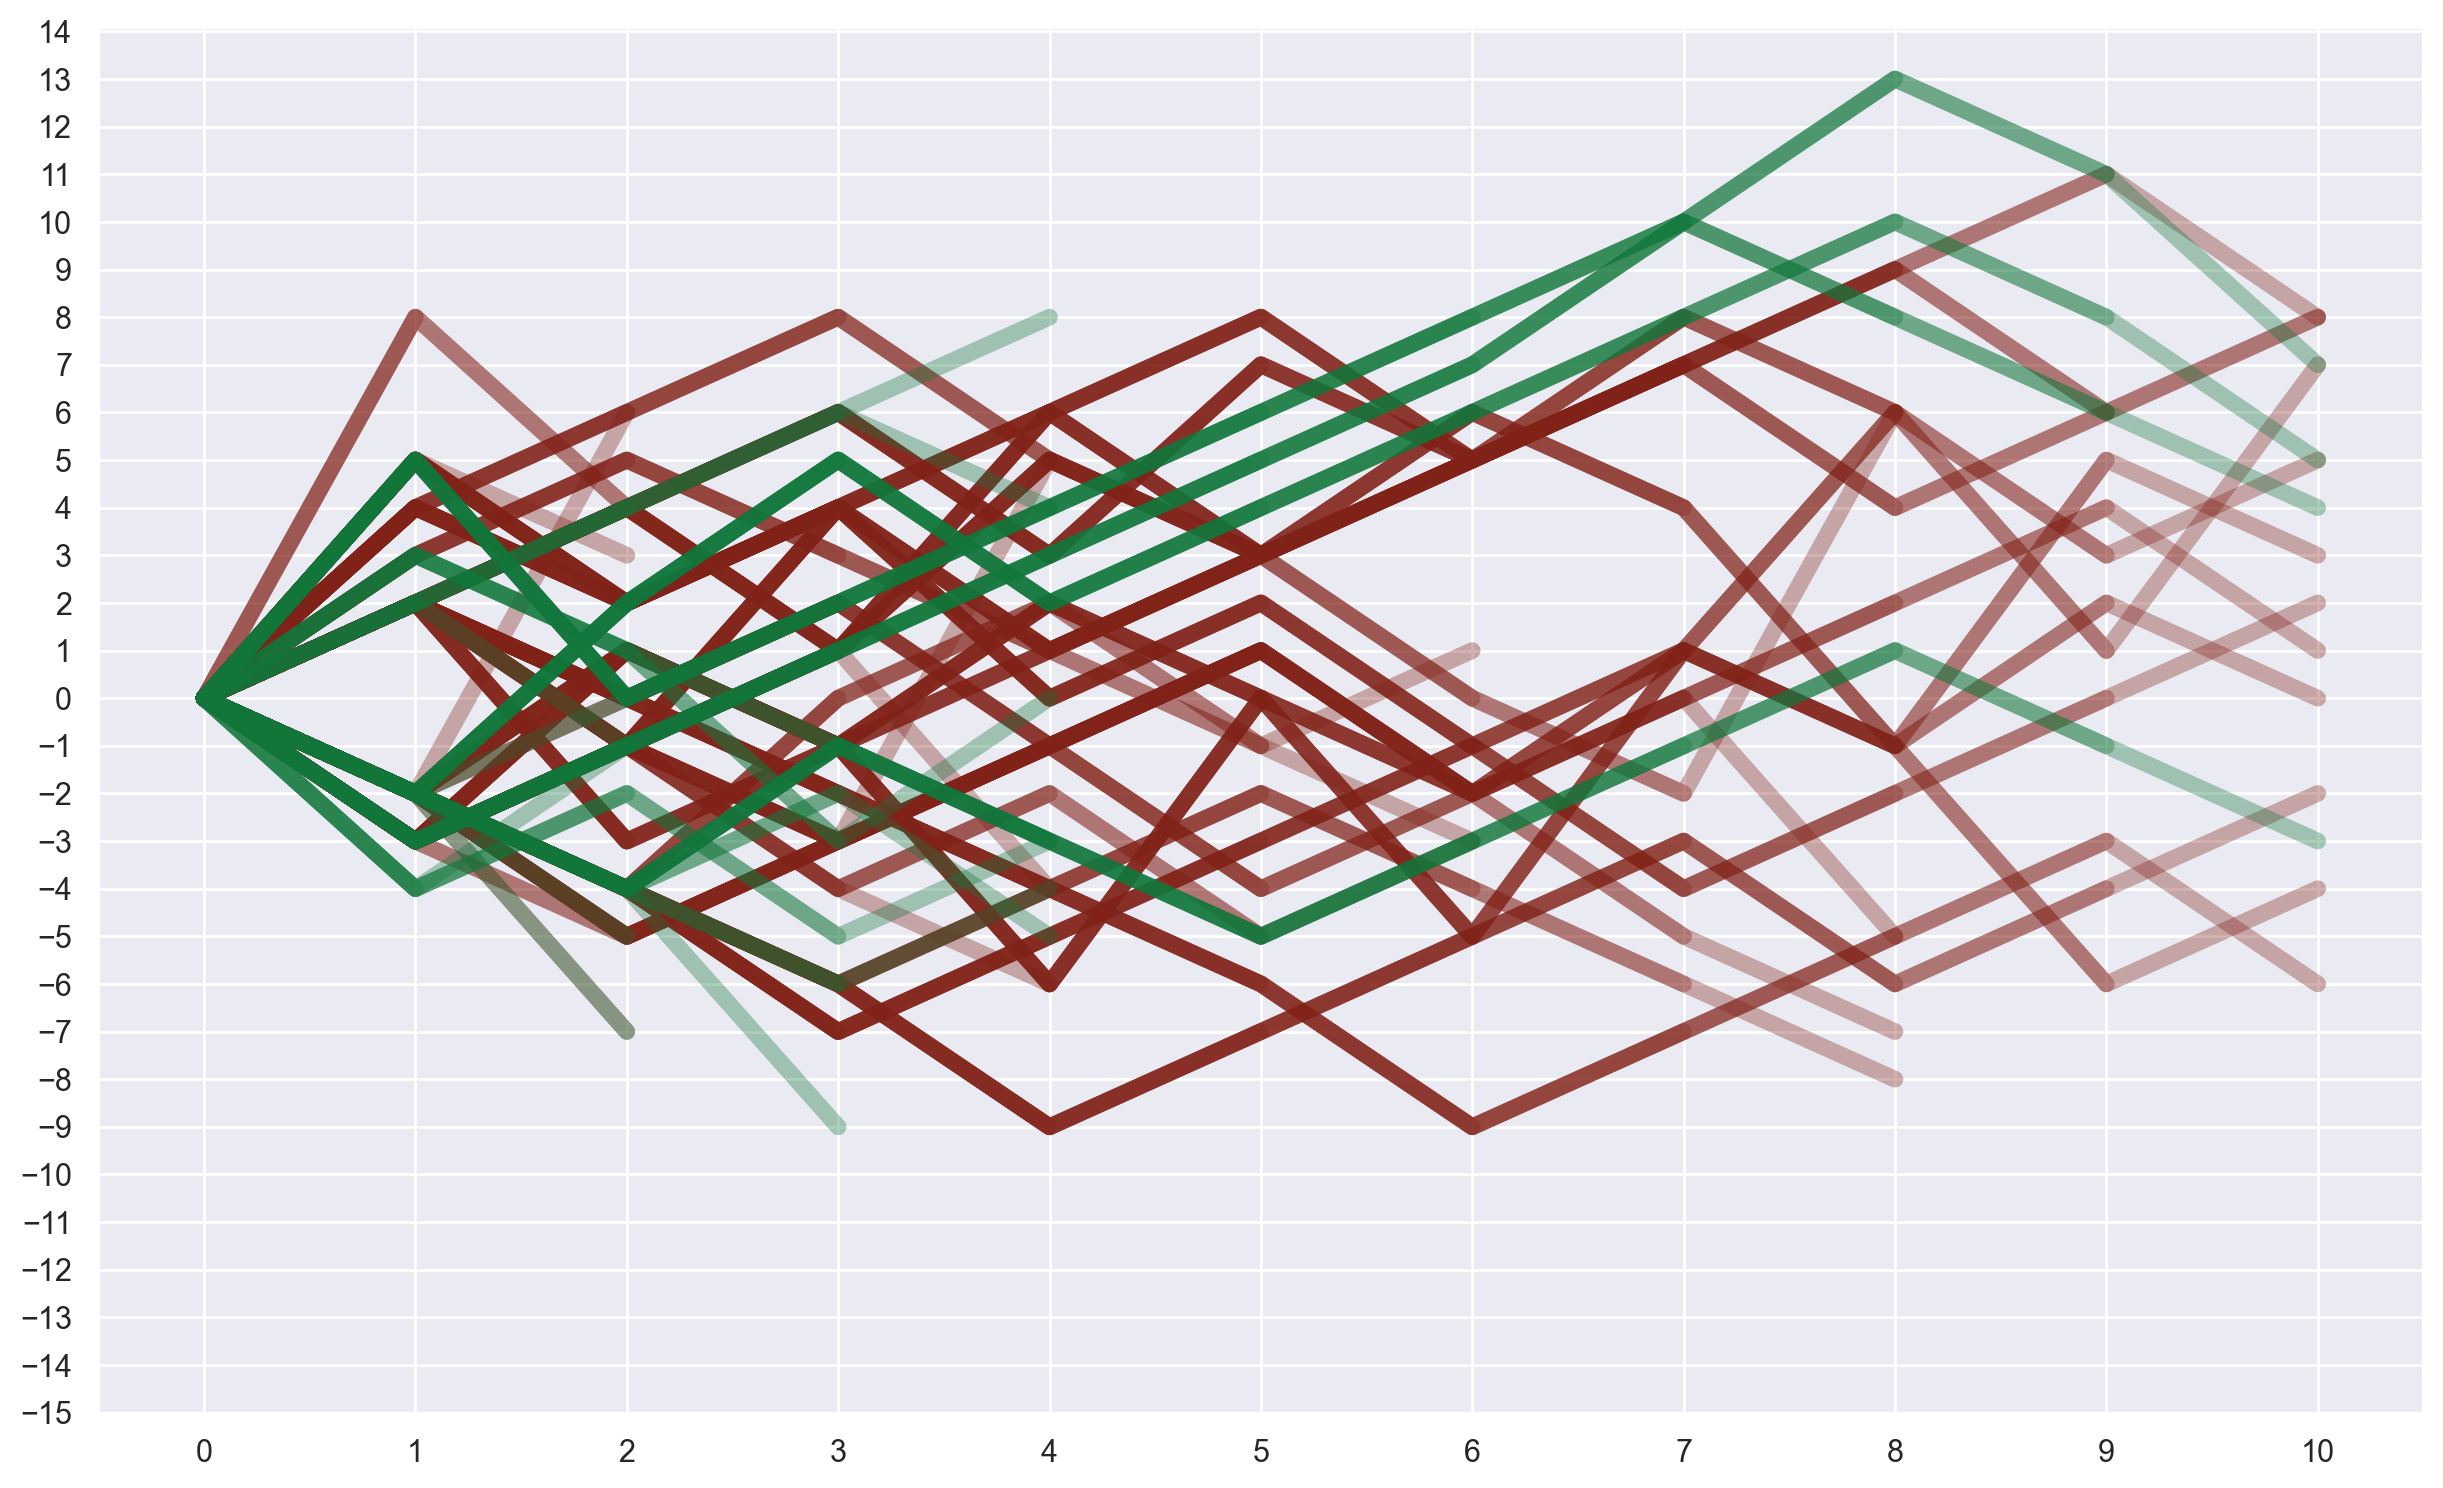

In [14]:
graphIntervalFamiliesMP([piece, piece_2], 10)

In [15]:
t_unique_ngrams_list = list(set(ngrams.values.flatten().tolist()))

# graph_pattern_list = createGraphList(total_unique_ngrams_list)
# for pattern in graph_pattern_list:
#     plt.plot(pattern, alpha=0.35, lw=6)
# plt.yticks(np.arange(min(list(map(lambda x: sorted(x)[0], graph_pattern_list))) - 1, max(list(map(lambda x: sorted(x)[-1], graph_pattern_list))) + 1, 1.0))
# plt.xticks(np.arange(0, max(list(map(lambda x: len(x), graph_pattern_list))), 1.0))
# plt.show()

NameError: name 'ngrams' is not defined